## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化(正規化)來觀察訓練情形。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [4]:
boston = datasets.load_boston()
#print(boston)

In [12]:
X= boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.1)

lasso = linear_model.Lasso(alpha = 1.0)
ridge = linear_model.Ridge(alpha = 1.0)

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
print(f'Lasso MSE: {mean_squared_error(y_test,y_pred)}')
y_pred = ridge.predict(X_test)
print(f'Ridge MSE: {mean_squared_error(y_test,y_pred)}')

Lasso MSE: 16.82704987895191
Ridge MSE: 12.359638371429323


In [13]:
# lasso 的相關係數
# coef_ 可以返回經過學習後的所有 feature 的參數。
lasso.coef_

array([-0.06121173,  0.0524154 , -0.        ,  0.        , -0.        ,
        0.82452304,  0.02659766, -0.68379958,  0.26618824, -0.01453242,
       -0.79579498,  0.00778683, -0.79886255])

In [15]:
ridge_coef

[array([-1.08030191e-01,  4.62231345e-02,  5.59097077e-02,  3.07810024e+00,
        -1.89058632e+01,  3.98204090e+00, -2.92747784e-04, -1.36920418e+00,
         3.01355492e-01, -1.16244995e-02, -9.64235139e-01,  8.83379014e-03,
        -5.08449699e-01]),
 array([-1.07729758e-01,  4.63104019e-02,  5.30586649e-02,  3.06432017e+00,
        -1.82606444e+01,  3.98748294e+00, -8.64318309e-04, -1.35990374e+00,
         2.99879435e-01, -1.16701268e-02, -9.56474235e-01,  8.87193848e-03,
        -5.09266635e-01]),
 array([-1.07449813e-01,  4.63925871e-02,  5.03973082e-02,  3.05112656e+00,
        -1.76579856e+01,  3.99244389e+00, -1.39695806e-03, -1.35121875e+00,
         2.98506462e-01, -1.17130054e-02, -9.49233598e-01,  8.90755640e-03,
        -5.10040060e-01]),
 array([-1.07188390e-01,  4.64701751e-02,  4.79074562e-02,  3.03846498e+00,
        -1.70938104e+01,  3.99696998e+00, -1.89439822e-03, -1.34309026e+00,
         2.97226681e-01, -1.17533975e-02, -9.42463366e-01,  8.94088602e-03,
       

In [20]:
import warnings
warnings.simplefilter("ignore")
    
lasso_coef = []
ridge_coef = []
lasso_errors = []
ridge_errors = []

alpha = np.linspace(0,1,20)

for a in alpha:
    '''
    alpha = 0 is equivalent to an ordinary least square, 
    solved by the LinearRegression object. 
    For numerical reasons, using alpha = 0 with the Lasso object is **not advised**. 
    Given this, you should use the LinearRegression object.
    '''
    #（在 scikit-learn 的 Lasso 裡面是 alpha，但是書上都是 λ）
    lasso = linear_model.Lasso(alpha=a)
    ridge = linear_model.Ridge(alpha=a)
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    lasso_coef.append(lasso.coef_)
    ridge_coef.append(ridge.coef_)
    lasso_errors.append(mean_squared_error(y_test,lasso.predict(X_test)))
    ridge_errors.append(mean_squared_error(y_test,ridge.predict(X_test)))
    

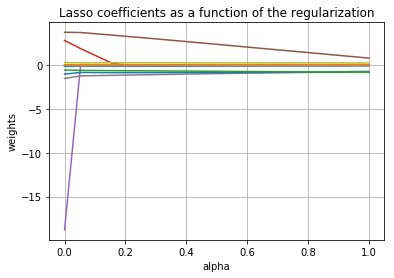

In [17]:
# 获得绘图句柄
ax = plt.gca()
# 参数中每一个维度使用一个颜色表示
# ax.set_color_cycle(['b', 'r', 'g', 'c', 'k'])

# 绘制alpha和对应的参数之间的关系图
ax.plot(alpha, lasso_coef)
# ax.set_xscale('log')    #x轴使用对数表示
# ax.set_xlim(ax.get_xlim()[::-1])  # 将x轴反转，便于显示
plt.grid()
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
# plt.axis('tight')
plt.show()


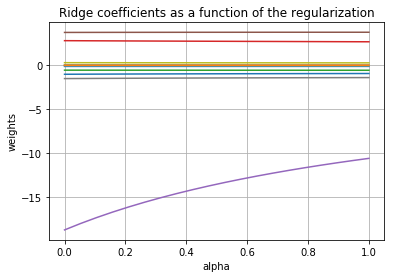

In [21]:
ax = plt.gca()
# 参数中每一个维度使用一个颜色表示
# ax.set_color_cycle(['b', 'r', 'g', 'c', 'k'])

# 绘制alpha和对应的参数之间的关系图
ax.plot(alpha, ridge_coef)
# ax.set_xscale('log')    #x轴使用对数表示
# ax.set_xlim(ax.get_xlim()[::-1])  # 将x轴反转，便于显示
plt.grid()
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
# plt.axis('tight')
plt.show()

In [22]:
lasso_errors

[12.482368388308267,
 13.051091149092278,
 13.023564403767091,
 13.115759124240205,
 13.224594484650904,
 13.292983073423171,
 13.401614232784622,
 13.544443864292072,
 13.709822532596025,
 13.886619331737926,
 14.083887742138874,
 14.30263693544862,
 14.542915132955873,
 14.804700544038198,
 15.087992120211085,
 15.392779722163052,
 15.719087439566518,
 16.06690036941226,
 16.436220099522348,
 16.82704987895191]

In [23]:
ridge_errors

[12.48236838830827,
 12.44473168111678,
 12.414592495905922,
 12.390647759118684,
 12.371842219107325,
 12.357315947660553,
 12.346364140545905,
 12.338406065009869,
 12.332960876817447,
 12.32962864364001,
 12.328075347969651,
 12.328020956127942,
 12.329229867290554,
 12.331503222962413,
 12.334672680385566,
 12.338595345055158,
 12.343149626392318,
 12.348231832743883,
 12.353753361603985,
 12.359638371429323]